In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors={'urban':'lightcoral','suburban':'lightskyblue','rural':'gold'}
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data =pd.read_csv(city_data_to_load)
ride_data =pd.read_csv(ride_data_to_load)

city_df = pd.DataFrame(city_data)
ride_df = pd.DataFrame(ride_data)

# Combine the data into a single dataset
combo_df =pd.merge(city_df, ride_df, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

# Display the data table for preview
combo_df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


## Bubble Plot of Ride Sharing Data

In [3]:
#aggregate rides and average of fares
combo_grouped_df = combo_df.groupby(['city','type'])

def summary(x):
    fields ={'Average Fare':x['fare'].mean(),
            'Total Rides': x['ride_id'].count(),
            'Number of Drivers': x['driver_count'].mean()}
    
    return pd.Series(fields)

summary_df =combo_grouped_df.apply(summary).reset_index(level='type')
summary_df.head()

,type,Average Fare,Total Rides,Number of Drivers
city,,,,
Amandaburgh,Urban,24.641667,18.0,12.0
Barajasview,Urban,25.332273,22.0,26.0
Barronchester,Suburban,36.422500,16.0,11.0
Bethanyland,Suburban,32.956111,18.0,22.0
Bradshawfurt,Rural,40.064000,10.0,7.0


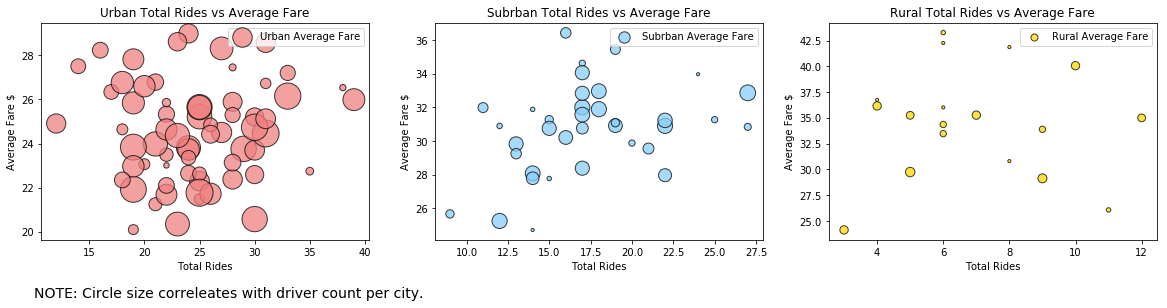

In [4]:
# Obtain the x and y coordinates for each of the three city types
# x_axis = summary_df['Total Rides']
# y_axis = summary_df['Average Fare']

urban_df=summary_df.loc[summary_df['type'] == 'Urban']
suburban_df=summary_df.loc[summary_df['type'] == 'Suburban']
rural_df=summary_df.loc[summary_df['type'] == 'Rural']

urban_x_axis = urban_df['Total Rides']
urban_y_axis = urban_df['Average Fare']

suburban_x_axis = suburban_df['Total Rides']
suburban_y_axis = suburban_df['Average Fare']

rural_x_axis = rural_df['Total Rides']
rural_y_axis = rural_df['Average Fare']

#Build the scatter plots for each city types
fig=plt.figure(figsize = (20,4))

ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors=colors['urban'], edgecolors="black",
            s=urban_df['Number of Drivers']*10, alpha=0.75)
ax1.title.set_text("Urban Total Rides vs Average Fare")
ax1.set_xlabel("Total Rides")
ax1.set_ylabel("Average Fare $")
ax1.legend(['Urban Average Fare'],loc ='best')
ax1.text(10, 17, 'NOTE: Circle size correleates with driver count per city.', fontsize=14)

ax2.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors=colors['suburban'], edgecolors="black",
            s=suburban_df['Number of Drivers']*10, alpha=0.75)
ax2.title.set_text("Subrban Total Rides vs Average Fare")
ax2.set_xlabel("Total Rides")
ax2.set_ylabel("Average Fare $")
ax2.legend(['Subrban Average Fare'],loc ="best")


ax3.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors=colors['rural'], edgecolors="black",
            s=rural_df['Number of Drivers']*10, alpha=0.75)
ax3.title.set_text("Rural Total Rides vs Average Fare")
ax3.set_xlabel("Total Rides")
ax3.set_ylabel("Average Fare $")
ax3.legend(['Rural Average Fare'], loc='best')

plt.savefig("Images/type_sep.png")
plt.show()

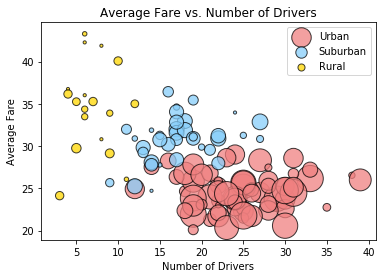

In [5]:
#Build the scatter plots for each city types

fig = plt.figure()
ax= fig.add_subplot(1,1,1)

ax.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors=colors['urban'], edgecolors="black",
            s=urban_df['Number of Drivers']*10, alpha=0.75, label ='Urban')

ax.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors=colors['suburban'], edgecolors="black",
            s=suburban_df['Number of Drivers']*10, alpha=0.75,label='Suburban')

ax.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors=colors['rural'], edgecolors="black",
             s=rural_df['Number of Drivers']*10, alpha=0.75, label ='Rural')
ax.set_title('Average Fare vs. Number of Drivers')
ax.set_xlabel('Number of Drivers')
ax.set_ylabel('Average Fare')
ax.legend(loc='best')

plt.savefig("Images/all_types.png")
plt.show()


In [21]:
def pie(x):
    fields ={'Sum of Fare':x['fare'].sum(),
            'Total Rides': x['ride_id'].count(),
            'Number of Drivers': x['driver_count'].sum()}
    
    return pd.Series(fields)

pie_df = combo_df.groupby(['type']).apply(pie).reset_index()
pie_df
# #print(pie_df.head())

# explode= (0,0,0.1)

# plt.pie(pie_df['Sum of Fare'], explode =explode, labels=pie_df['type'], colors=["gold","lightskyblue" ,"lightcoral"],
#         autopct="%1.1f%%", shadow=True, startangle=140)

# plt.title('Percent of Fares')
# plt.savefig("Images/pie_fare.png")
# plt.show()


,type,Sum of Fare,Total Rides,Number of Drivers
0,Rural,4327.93,125.0,537.0
1,Suburban,19356.33,625.0,8570.0
2,Urban,39854.38,1625.0,59602.0


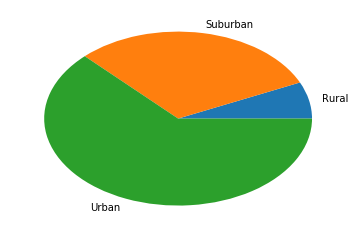

In [52]:
new_df=combo_df.groupby('type') #group the merged df by type
fare_sum=new_df['fare'].sum().reset_index() #sum fares and reset index so you can use 'type' as a field.

plt.pie(fare_sum['fare'], labels=fare_sum['type']) #create a pie chart using sum of 'fare' and labels from 'type'
plt.show()

In [ ]:

explode2=(1,0,0)
plt.pie(pie_df['Number of Drivers'], explode =explode2, labels=pie_df['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=.6)

plt.title('Percent of Drivers')
plt.savefig("Images/pie_drivers.png")
plt.show()


## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
plt.pie(pie_df['Total Rides'], explode =explode, labels=pie_df['type'], colors=["gold","lightskyblue" ,"lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Percent of Rides')
plt.savefig("Images/pie_rides.png")
plt.show()


## Total Drivers by City Type

In [ ]:
labels=['dogs','frogs','hogs']
fracs =[77,3,20]
plt.pie(fracs, labels=labels, colors=["gold","lightskyblue" ,"lightcoral"],autopct="%1.1f%%",shadow=True, startangle=140)

plt.show()